In [1]:
import numpy as np
import pandas as pd
from sklearn import svm,metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
missing_values = [" ?",np.nan]
adults_data= pd.read_csv('adults.csv', na_values = missing_values)
adults_data.head()

,Age,Type of Job,Qualification,Experience,Marital Status,Occupation,Unnamed: 6,Race,Gender,Unnamed: 9,Unnamed: 10,Unnamed: 11,Location,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [3]:
adults_data.shape

(32561, 14)

In [4]:
adults_data[['Type of Job','Qualification','Marital Status','Occupation','Unnamed: 6','Race','Gender','Location']].describe()

,Type of Job,Qualification,Marital Status,Occupation,Unnamed: 6,Race,Gender,Location
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [5]:
adults_data.describe()

,Age,Experience,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adults_data[['Type of Job']].value_counts()

Type of Job      
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [7]:
adults_data[['Qualification']].value_counts()

Qualification
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [8]:
adults_data[['Marital Status']].value_counts()

Marital Status        
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [9]:
adults_data[['Occupation']].value_counts()

Occupation        
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [10]:
adults_data[['Unnamed: 6']].value_counts()

Unnamed: 6     
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [11]:
adults_data[['Race']].value_counts()

Race               
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [12]:
adults_data[['Gender']].value_counts()

Gender 
 Male      21790
 Female    10771
dtype: int64

In [13]:
adults_data[['Location']].value_counts()

Location                   
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece   

In [14]:
reduced_data=adults_data.drop(columns=['Unnamed: 6','Unnamed: 9','Unnamed: 10','Unnamed: 11','Marital Status','Race'])
reduced_data.head()

,Age,Type of Job,Qualification,Experience,Occupation,Gender,Location,Salary
0,39,State-gov,Bachelors,13,Adm-clerical,Male,United-States,<=50K
1,40,Private,Assoc-voc,11,Craft-repair,Male,NaN,>50K
2,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,United-States,<=50K
3,38,Private,HS-grad,9,Handlers-cleaners,Male,United-States,<=50K
4,53,Private,11th,7,Handlers-cleaners,Male,United-States,<=50K


In [15]:
reduced_data.describe()

,Age,Experience
count,32561.000000,32561.000000
mean,38.581647,10.080679
std,13.640433,2.572720
min,17.000000,1.000000
25%,28.000000,9.000000
50%,37.000000,10.000000
75%,48.000000,12.000000
max,90.000000,16.000000


In [16]:
reduced_data.isnull().sum()

Age                 0
Type of Job      1836
Qualification       0
Experience          0
Occupation       1843
Gender              0
Location          583
Salary              0
dtype: int64

In [17]:
reduced_data= reduced_data.fillna(method='ffill') #missing values are forward filled
#reduced_data= reduced_data.dropna()
reduced_data.head()

,Age,Type of Job,Qualification,Experience,Occupation,Gender,Location,Salary
0,39,State-gov,Bachelors,13,Adm-clerical,Male,United-States,<=50K
1,40,Private,Assoc-voc,11,Craft-repair,Male,United-States,>50K
2,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,United-States,<=50K
3,38,Private,HS-grad,9,Handlers-cleaners,Male,United-States,<=50K
4,53,Private,11th,7,Handlers-cleaners,Male,United-States,<=50K


In [18]:
reduced_data.isnull().sum()

Age              0
Type of Job      0
Qualification    0
Experience       0
Occupation       0
Gender           0
Location         0
Salary           0
dtype: int64

In [19]:
labelencoder = LabelEncoder()
reduced_data['TypeOfJob_labelled']=labelencoder.fit_transform(reduced_data['Type of Job'])
reduced_data = reduced_data.drop(columns = ['Type of Job'])
reduced_data['Qualification_labelled']=labelencoder.fit_transform(reduced_data['Qualification'])
reduced_data = reduced_data.drop(columns = ['Qualification'])
reduced_data['Occupation_labelled']=labelencoder.fit_transform(reduced_data['Occupation'])
reduced_data = reduced_data.drop(columns = ['Occupation'])
reduced_data['Gender_labelled']=labelencoder.fit_transform(reduced_data['Gender'])
reduced_data = reduced_data.drop(columns = ['Gender'])
reduced_data['Location_labelled']=labelencoder.fit_transform(reduced_data['Location'])
reduced_data = reduced_data.drop(columns = ['Location'])
reduced_data['Salary_labelled']=labelencoder.fit_transform(reduced_data['Salary'])
reduced_data = reduced_data.drop(columns = ['Salary'])
reduced_data.head()

#label encoding of non-numeric columns

,Age,Experience,TypeOfJob_labelled,Qualification_labelled,Occupation_labelled,Gender_labelled,Location_labelled,Salary_labelled
0,39,13,6,9,0,1,38,0
1,40,11,3,8,2,1,38,1
2,50,13,5,9,3,1,38,0
3,38,9,3,11,5,1,38,0
4,53,7,3,1,5,1,38,0


<AxesSubplot:ylabel='Frequency'>

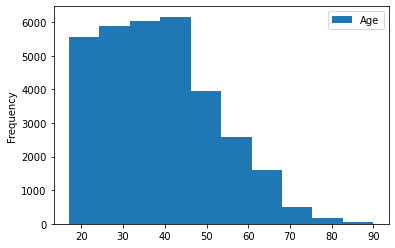

In [20]:
reduced_data[['Age']].plot(kind='hist')
#right skewed

<AxesSubplot:xlabel='Salary_labelled', ylabel='count'>

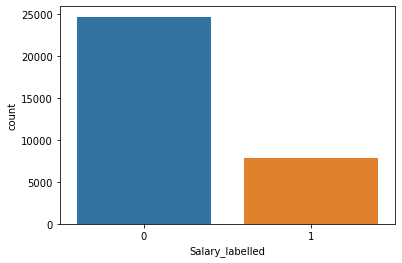

In [21]:
#reduced_data[['Salary_labelled']].plot(kind='hist')
sns.countplot(x="Salary_labelled", data= reduced_data)
# 0 = <=50k
# 1 = >50k

In [22]:
reduced_data.shape

(32561, 8)

In [23]:
X = reduced_data.drop(columns=['Salary_labelled'])
y = reduced_data['Salary_labelled']
print(X.shape, y.shape)

(32561, 7) (32561,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

In [25]:
X_train.shape

(26048, 7)

In [26]:
X_test.shape

(6513, 7)

In [27]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
confusion_matrix= confusion_matrix(y_test,y_pred)
TN,FP,FN,TP = confusion_matrix.ravel()
confusion_matrix

array([[4684,  310],
       [ 960,  559]], dtype=int64)

In [30]:
Accuracy=(TP+TN)/y_test.shape[0]
print("Accuracy:",Accuracy)

Accuracy: 0.8050053738676494


In [31]:
ErrorRate = 1- Accuracy
print('Error Rate:', ErrorRate)

Error Rate: 0.19499462613235063


In [32]:
Precision = TP/(TP+FP)
print('Precision:', Precision)

Precision: 0.6432681242807825


In [33]:
Recall = TP/(FN+TP)
print('Recall:', Recall)

Recall: 0.36800526662277816
